In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Dense, Reshape, Dropout # type: ignore
from tensorflow.keras.regularizers import l2
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import pydot
from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG


## broad trainning

In [6]:
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'broad_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
broad_loaded = loaded_data[:, :y_point]
Ibroad_loaded = loaded_data[:, y_point:]

In [7]:
#train, validation and test sets division
alpha=0.7
beta=0.8
inputs_all =Ibroad_loaded
targets_all=broad_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]


np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

np.random.seed(7)
np.random.shuffle(inputs_test)
np.random.seed(7)
np.random.shuffle(targets_test)

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1180 - val_loss: 0.0935 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0791 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.0540 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 10/1

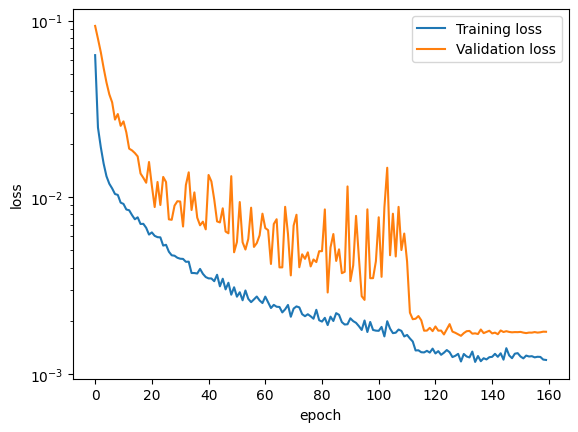

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000099)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0000091)))
model.add(BatchNormalization())
model.add(Dropout(0.15))  

model.add(Dense(510, activation='relu'))
# model.add(Dropout(0.3))  
model.add(Dense(256, activation='relu'))
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])           
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

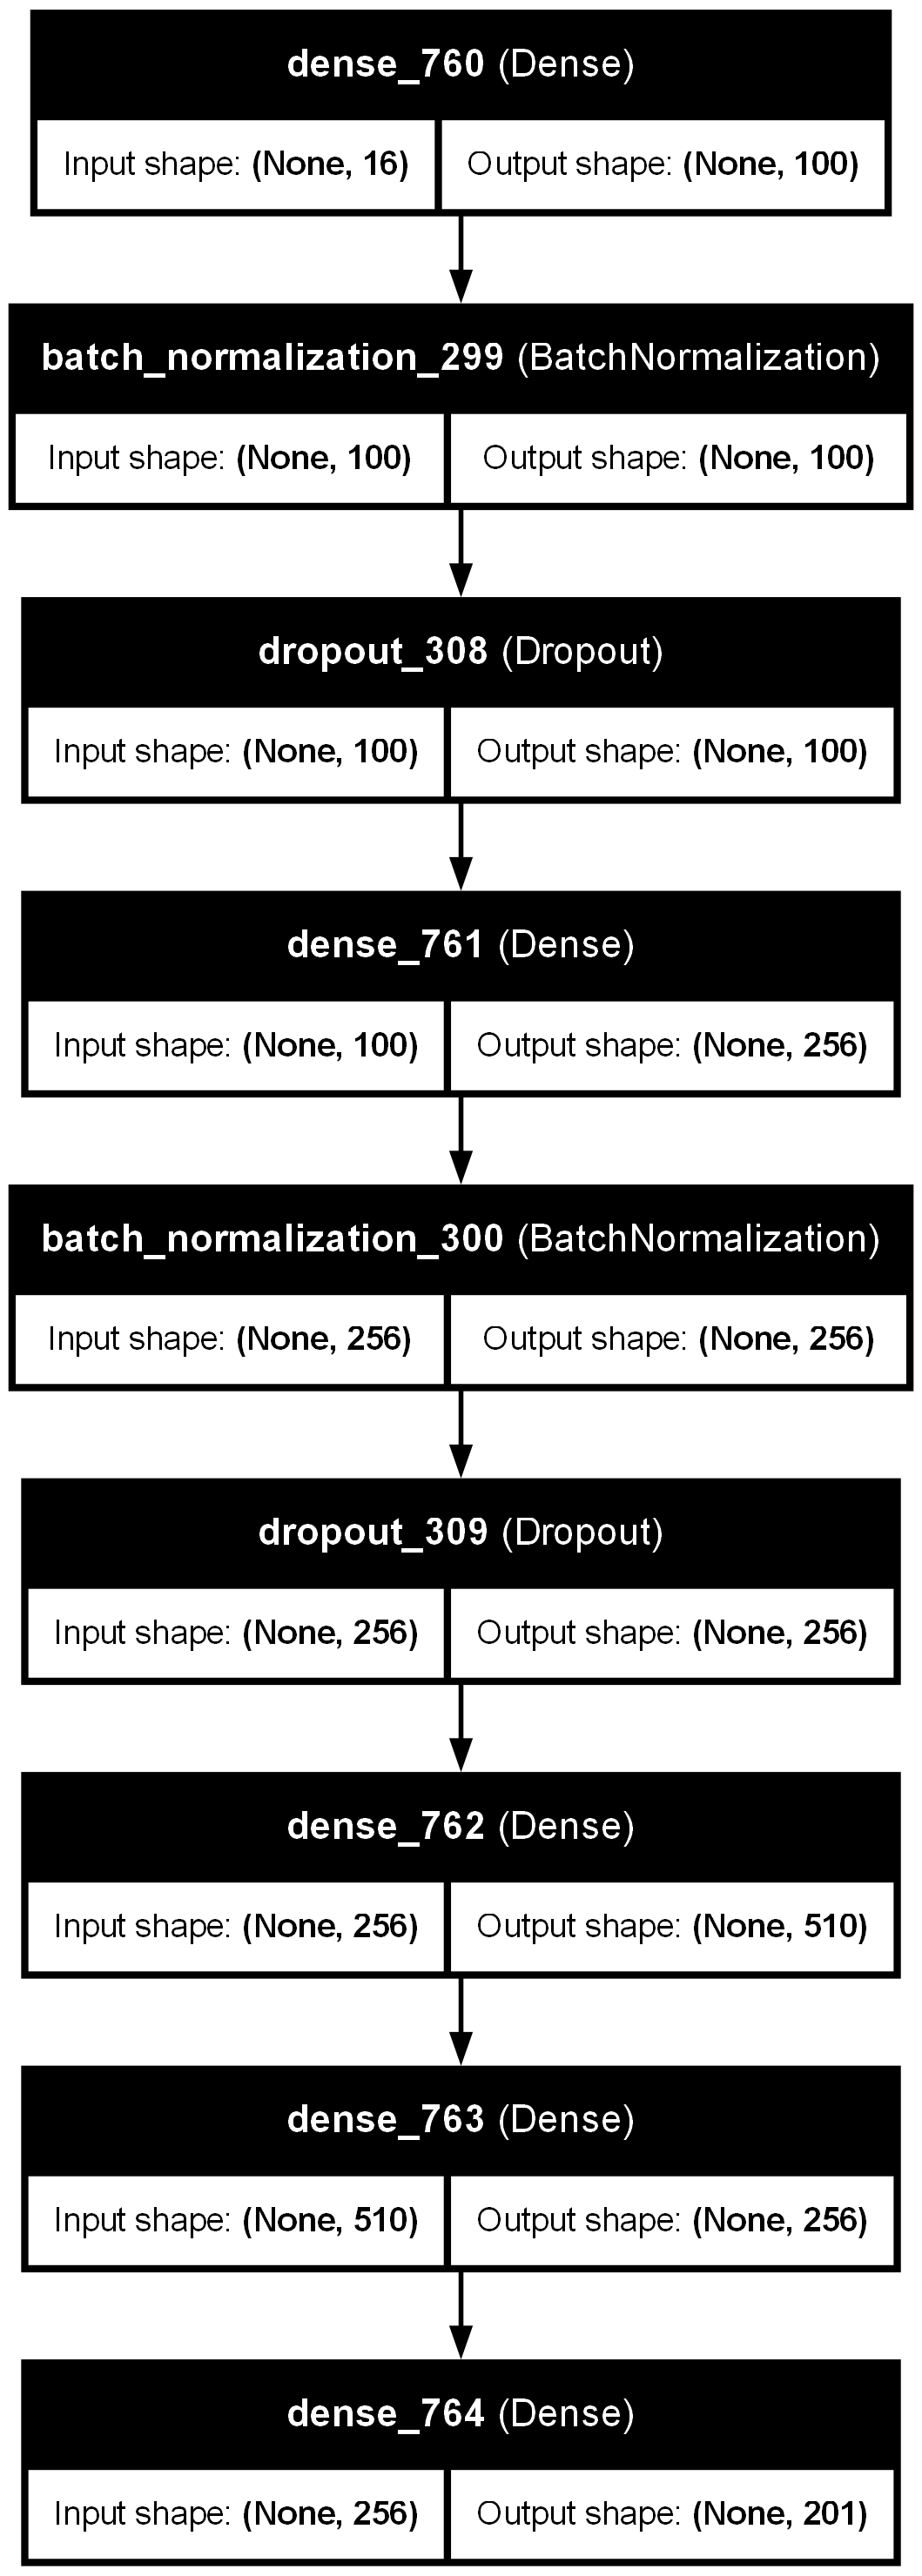

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# model = load_model('.keras')
dot = model_to_dot(model, show_shapes=False, show_layer_names=True, dpi=60)
SVG(dot.create(prog='dot', format='svg'))
plot_model(model, to_file='BBmodel.png', show_shapes=True, show_layer_names=True)

In [8]:
# testing sets results
targets=targets_test
targets_pre=model.predict(inputs_test)
L=np.arange(start=1,stop=y_point+1,step=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


i-th error: 0.045619847952918534


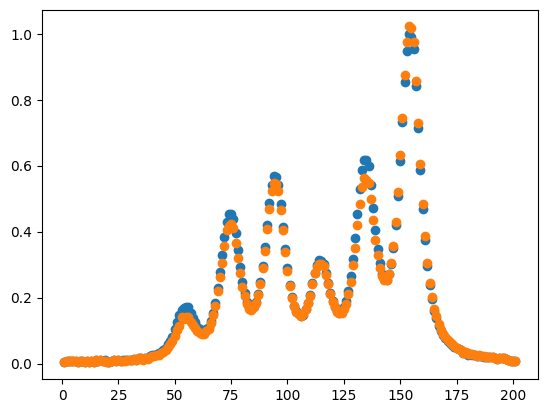

In [346]:
# ith reconstruction result
ith=320
plt.scatter(L,targets_test[ith,0:y_point])
plt.scatter(L,targets_pre[ith,0:y_point])
iL1mse = np.linalg.norm(targets[ith,:] - targets_pre[ith,:],1)/np.linalg.norm(targets[ith,: ],1)
print("i-th error:", iL1mse)

a=targets[ith,:]
combined_data = np.column_stack((targets[ith,:], targets_pre[ith,:]))
np.savetxt('320-th_targets_targets_pre_0.0456error.csv', combined_data, delimiter=',')

i-th error: 0.04141980141031167


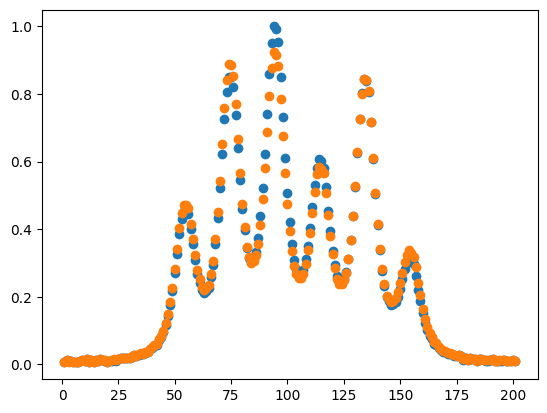

In [ ]:
# ith reconstruction result
ith=100
plt.scatter(L,targets_test[ith,0:y_point])
plt.scatter(L,targets_pre[ith,0:y_point])
iL1mse = np.linalg.norm(targets[ith,:] - targets_pre[ith,:],1)/np.linalg.norm(targets[ith,: ],1)
print("i-th error:", iL1mse)

In [ ]:
errors = []
for ith in range(targets.shape[0]):
    iL1mse = np.linalg.norm(targets[ith, :] - targets_pre[ith, :],1) / np.linalg.norm(targets[ith, :],1)
    errors.append(iL1mse)
average_error = np.mean(errors)
print(f"mean error: {average_error}")
std_error = np.std(errors)

mean error: 0.08379653784120186


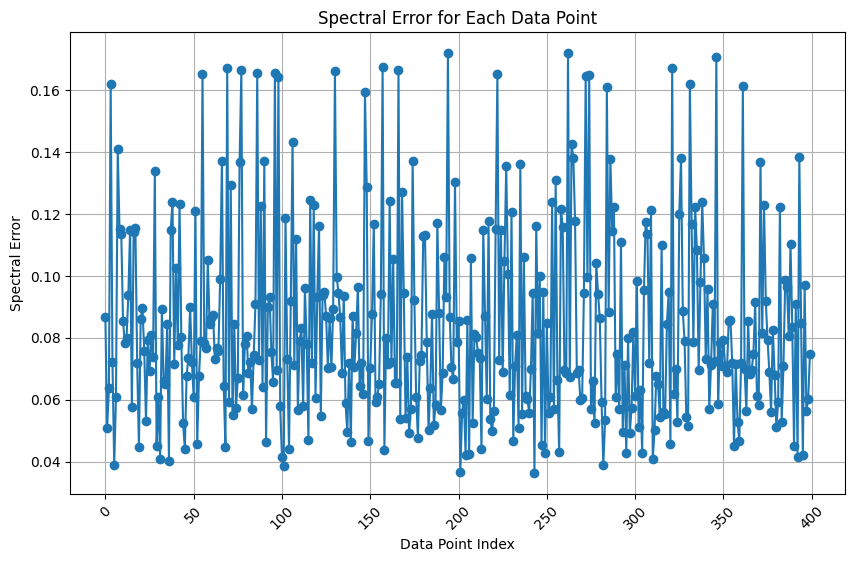

In [14]:
errors=np.loadtxt("spectra_testerror.csv", delimiter=",")
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, marker='o', linestyle='-')
plt.title('Spectral Error for Each Data Point')
plt.xlabel('Data Point Index')
plt.xticks(rotation=45)
plt.ylabel('Spectral Error')
plt.grid(True)

## sigma=0.001

In [263]:
#add noise
sigma=0.001
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'broad_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
broad_loaded = loaded_data[:, :y_point]
Ibroad_loaded = loaded_data[:, y_point:]

noise_std=sigma
noise = np.random.normal(0, noise_std, Ibroad_loaded.shape)
noisy_signal = Ibroad_loaded + noise*np.amax(Ibroad_loaded, axis=0)

In [264]:
alpha=0.7
beta=0.8
inputs_all= noisy_signal
targets_all=broad_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1182 - val_loss: 0.0912 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - val_loss: 0.0776 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - val_loss: 0.0601 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 10/1

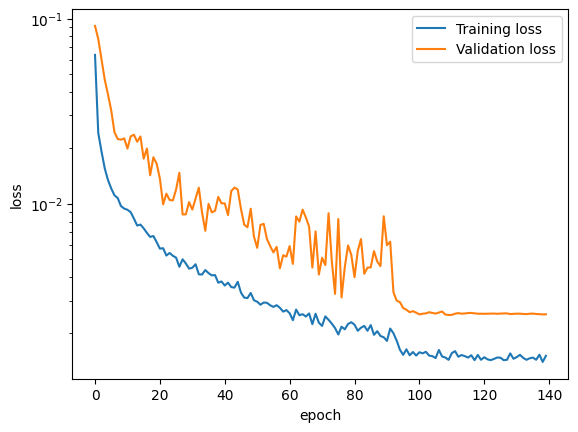

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000099)))
model.add(BatchNormalization())
model.add(Dropout(0.3)) 
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0000091)))
model.add(BatchNormalization())
model.add(Dropout(0.15)) 

model.add(Dense(510, activation='relu'))
# model.add(Dropout(0.3)) 
model.add(Dense(256, activation='relu'))
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])
             
                  
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
errors = []
for ith in range(targets.shape[0]):
    iL1mse = np.linalg.norm(targets[ith, :] - targets_pre[ith, :],1) / np.linalg.norm(targets[ith, :],1)
    errors.append(iL1mse)
average_error = np.mean(errors)
print(f"所有数据光谱误差的平均值: {average_error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
所有数据光谱误差的平均值: 0.09329736018637007


## sigma=0.005

In [207]:
#add noise
sigma=0.005
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'broad_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
broad_loaded = loaded_data[:, :y_point]
Ibroad_loaded = loaded_data[:, y_point:]

noise_std=sigma
noise = np.random.normal(0, noise_std, Ibroad_loaded.shape)
noisy_signal = Ibroad_loaded + noise*np.amax(Ibroad_loaded, axis=0)

In [208]:
alpha=0.7
beta=0.8
inputs_all =noisy_signal
targets_all=broad_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1205 - val_loss: 0.0930 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - val_loss: 0.0773 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - val_loss: 0.0626 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - val_loss: 0.0524 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - val_loss: 0.0330 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0270 - learning_rate: 0.0010
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 10/1

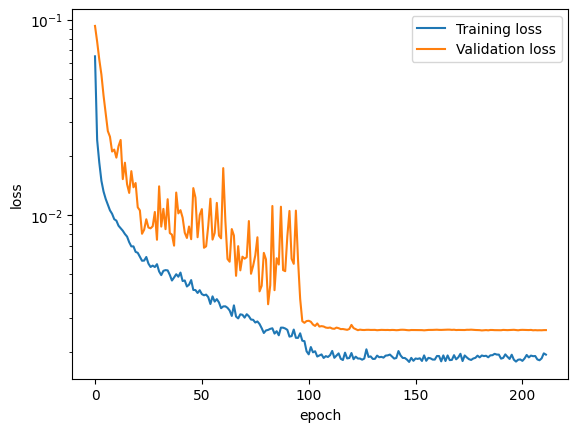

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000099)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0000091)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(510, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])            
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
errors = []
for ith in range(targets.shape[0]):
    iL1mse = np.linalg.norm(targets[ith, :] - targets_pre[ith, :],1) / np.linalg.norm(targets[ith, :],1)
    errors.append(iL1mse)
average_error = np.mean(errors)
print(f"所有数据光谱误差的平均值: {average_error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
所有数据光谱误差的平均值: 0.10557038349078814


## sigma=0.01

In [270]:
#add noise
sigma=0.01
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'broad_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
broad_loaded = loaded_data[:, :y_point]
Ibroad_loaded = loaded_data[:, y_point:]

noise_std=sigma
noise = np.random.normal(0, noise_std, Ibroad_loaded.shape)
noisy_signal = Ibroad_loaded + noise*np.amax(Ibroad_loaded, axis=0)

In [271]:
alpha=0.7
beta=0.8
inputs_all =noisy_signal
targets_all=broad_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1275 - val_loss: 0.0905 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 - val_loss: 0.0792 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207 - val_loss: 0.0642 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - val_loss: 0.0555 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - val_loss: 0.0253 - learning_rate: 0.0010
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - val_loss: 0.0223 - learning_rate: 0.0010
Epoch 10/1

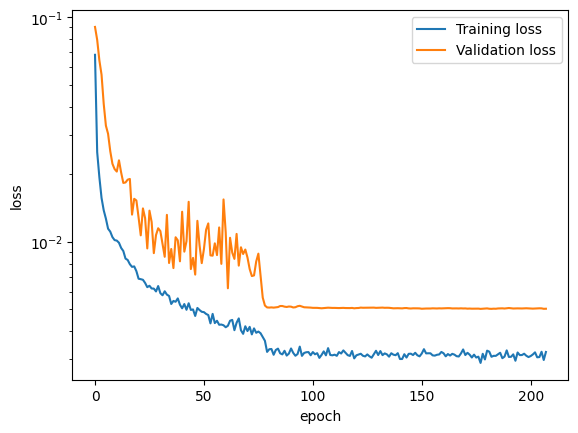

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000099)))
model.add(BatchNormalization())
model.add(Dropout(0.3)) 
model.add(Dense(300, activation='relu',kernel_regularizer=l2(0.0000091)))
model.add(BatchNormalization())
model.add(Dropout(0.15))  

model.add(Dense(510, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])      
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
errors = []

for ith in range(targets.shape[0]):
    iL1mse = np.linalg.norm(targets[ith, :] - targets_pre[ith, :],1) / np.linalg.norm(targets[ith, :],1)
    errors.append(iL1mse)
average_error = np.mean(errors)
print(f"所有数据光谱误差的平均值: {average_error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
所有数据光谱误差的平均值: 0.1358487674373463


## sigma=0.05

In [ ]:
#add noise
sigma=0.05
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'broad_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
broad_loaded = loaded_data[:, :y_point]
Ibroad_loaded = loaded_data[:, y_point:]

noise_std=sigma
noise = np.random.normal(0, noise_std, Ibroad_loaded.shape)
noisy_signal = Ibroad_loaded + noise*np.amax(Ibroad_loaded, axis=0)

In [227]:
alpha=0.7
beta=0.8
inputs_all =noisy_signal
targets_all=broad_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0848 - val_loss: 0.0902 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - val_loss: 0.0541 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - val_loss: 0.0481 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - val_loss: 0.0369 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0278 - learning_rate: 0.0010
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - val_loss: 0.0208 - learning_rate: 0.0010
Epoch 10/1

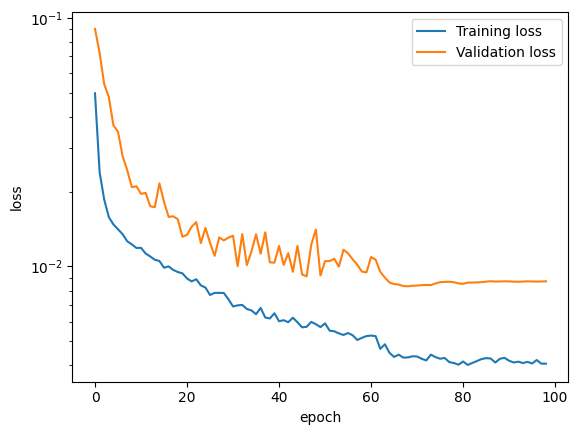

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000099)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0000091)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(300, activation='relu',kernel_regularizer=l2(0.0000081)))
model.add(Dropout(0.15))
model.add(Dense(510, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler]) 
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
errors = []
for ith in range(targets.shape[0]):
    iL1mse = np.linalg.norm(targets[ith, :] - targets_pre[ith, :],1) / np.linalg.norm(targets[ith, :],1)
    errors.append(iL1mse)
average_error = np.mean(errors)
print(f"所有数据光谱误差的平均值: {average_error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
所有数据光谱误差的平均值: 0.1702984028552021


## sigma=0.1

In [ ]:
#add noise
sigma=0.1
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'broad_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
broad_loaded = loaded_data[:, :y_point]
Ibroad_loaded = loaded_data[:, y_point:]

noise_std=sigma
noise = np.random.normal(0, noise_std, Ibroad_loaded.shape)
noisy_signal = Ibroad_loaded + noise*np.amax(Ibroad_loaded, axis=0)

In [314]:
alpha=0.7
beta=0.8
inputs_all =noisy_signal
targets_all=broad_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0948 - val_loss: 0.0883 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - val_loss: 0.0509 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - val_loss: 0.0424 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - val_loss: 0.0253 - learning_rate: 0.0010
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - val_loss: 0.0204 - learning_rate: 0.0010
Epoch 10/1

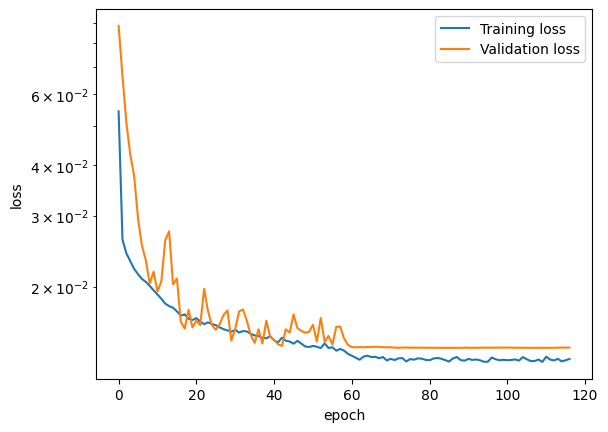

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000099)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0000091)))
model.add(BatchNormalization())
model.add(Dropout(0.15)) 

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(510, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(201))


model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])           
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
errors = []
for ith in range(targets.shape[0]):
    iL1mse = np.linalg.norm(targets[ith, :] - targets_pre[ith, :],1) / np.linalg.norm(targets[ith, :],1)
    errors.append(iL1mse)
average_error = np.mean(errors)
print(f"所有数据光谱误差的平均值: {average_error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
所有数据光谱误差的平均值: 0.286955321395716
